In [1]:
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

## Visualiser les frontières de décisions

### On crée un dataframe aléatoire avec une forme de lune

In [2]:
X, Y = make_moons(random_state=0, noise=0.3)

In [3]:
X.shape, Y.shape

((100, 2), (100,))

In [4]:
df_moon = pd.DataFrame({'X0':X[:,0],
                        'X1':X[:,1],
                        'Y':Y})
df_moon.head()

,X0,X1,Y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


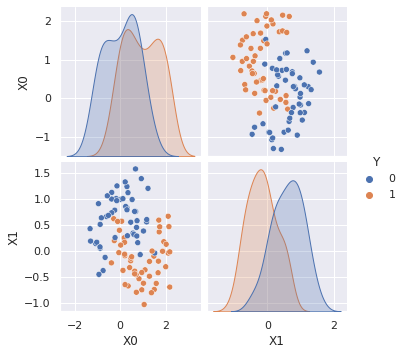

In [5]:
sns.pairplot(df_moon, hue='Y')

## Créer un maillage

In [6]:
def plage_de_valeur(df, col, b=0.2):
    # b = bordure
    mini = df[col].min() - b
    maxi = df[col].max() + b
    return mini, maxi

### Créer les axes

In [7]:
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

In [8]:
X0_range

array([-1.51850034, -1.41850034, -1.31850034, -1.21850034, -1.11850034,
       -1.01850034, -0.91850034, -0.81850034, -0.71850034, -0.61850034,
       -0.51850034, -0.41850034, -0.31850034, -0.21850034, -0.11850034,
       -0.01850034,  0.08149966,  0.18149966,  0.28149966,  0.38149966,
        0.48149966,  0.58149966,  0.68149966,  0.78149966,  0.88149966,
        0.98149966,  1.08149966,  1.18149966,  1.28149966,  1.38149966,
        1.48149966,  1.58149966,  1.68149966,  1.78149966,  1.88149966,
        1.98149966,  2.08149966,  2.18149966,  2.28149966])

In [9]:
X1_range

array([-1.23570207, -1.13570207, -1.03570207, -0.93570207, -0.83570207,
       -0.73570207, -0.63570207, -0.53570207, -0.43570207, -0.33570207,
       -0.23570207, -0.13570207, -0.03570207,  0.06429793,  0.16429793,
        0.26429793,  0.36429793,  0.46429793,  0.56429793,  0.66429793,
        0.76429793,  0.86429793,  0.96429793,  1.06429793,  1.16429793,
        1.26429793,  1.36429793,  1.46429793,  1.56429793,  1.66429793,
        1.76429793])

### Création du maillage

In [10]:
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)

In [11]:
X0_mesh.shape, X1_mesh.shape

((31, 39), (31, 39))

### Déméler le maillage

In [12]:
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()
X0_mesh.shape, X1_mesh.shape

((1209,), (1209,))

In [13]:
mesh_df = pd.DataFrame({"X0": X0_mesh,
                        "X1": X1_mesh})

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

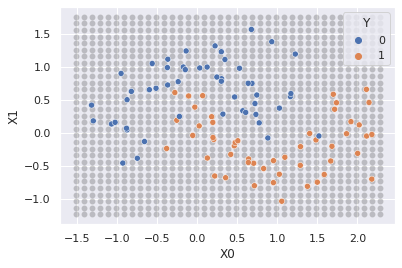

In [14]:
sns.scatterplot(X0_mesh, X1_mesh, color='black', alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

### Avec K1

In [15]:
knn = KNN(n_neighbors=1)
# entrainer sur moon
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

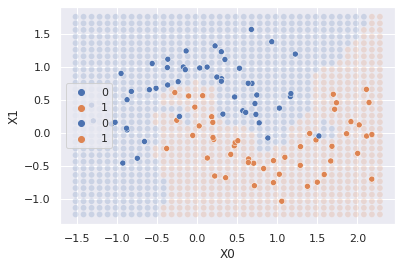

In [16]:
mesh_predictions = knn.predict(mesh_df)
sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

In [17]:
def plot_knn_decision(k=1):
    knn = KNN(n_neighbors=k)
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


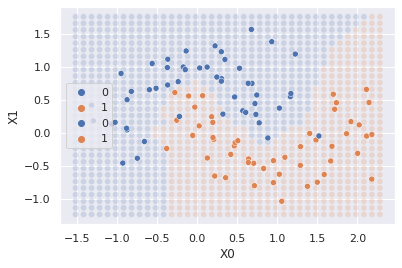

In [18]:
plot_knn_decision(3)